## Chapter 6, Question 8

### In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

### (a) Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector " of length n = 100.

In [2]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Generate predictor X and noise vector epsilon
n = 100
X = np.random.normal(loc=0, scale=1, size=n)
epsilon = np.random.normal(loc=0, scale=1, size=n)

print("Predictor X:", X)
print("Noise vector:", epsilon)

Predictor X: [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  

### (b) Generate a response vector Y of length n = 100 according to the model
### Y = β0 + β1X + β2X2 + β3X3 + ",
### where β0, β1, β2, and β3 are constants of your choice.

In [3]:
# Choose constants for beta coefficients
beta0 = 2
beta1 = 0.5
beta2 = -0.2
beta3 = 0.1

# Calculate Y based on the model
Y = beta0 + beta1 * X + beta2 * X**2 + beta3 * X**3 + epsilon

print("Response vector Y:", Y)

Response vector Y: [ 4.69175278  0.82670193  1.12105444  4.21081029  1.71446283  3.17063076
  1.96665307  1.17193804  3.8690918   3.65901814  3.93572991  3.51776509
  1.44753516  3.96812164  1.92327008  2.95074093  3.58135618  1.73312928
  2.75407936  2.28695836 -1.8675975   1.16988877  2.64560128  2.80426249
  2.57928126  0.39252227  1.58731652  3.74800839  3.32891495  3.02757497
  1.30312791  2.70513706  0.65416972 -0.52045492  1.16177805  2.75010097
  3.07523179  2.27757784  2.16652813  0.73474707 -0.35071129  1.03975289
  0.23451048  3.59168659  4.06313164  2.67865347 -0.04974491  3.43186183
 -1.06415611  1.42203074  1.25184913  3.88264694  0.93433021  0.13989948
  1.88729528  1.52185254  3.15903906  1.05577388  0.42937453  1.34972015
  1.04488785  3.71925153  2.3568405   0.11395849  0.85754008  2.60470106
 -0.78005667  0.65369784  2.49505462  2.34238966  3.21784598  2.38010637
  3.31480503  0.23831694  1.14106528  2.21328131  0.54350275  0.93461666
  1.36625415  2.04494864  0.6337

### (c) Use forward stepwise selection in order to select a model containing the predictors X, X2,...,X10. What is the model obtained according to Cp? Report the coeffcients of the model obtained.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

X_poly = np.column_stack([X**i for i in range(1, 11)])

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward", scoring="neg_mean_squared_error", cv=5)
sfs.fit(X_poly, Y)

selected_features_forward = sfs.get_support()

model.fit(X_poly[:, selected_features_forward], Y)
coefficients = model.coef_
intercept = model.intercept_

print("Selected features (according to Cp):", selected_features_forward)
print("Coefficients of the model:", coefficients)
print("Intercept:", intercept)

Selected features (according to Cp): [ True  True False  True  True False  True False False False]
Coefficients of the model: [-0.0081843  -0.38138341  0.09334592 -0.01230947  0.80499994]
Intercept: 2.2420505559121358


### (d) Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [20]:
sfs_backward = SequentialFeatureSelector(model, n_features_to_select="auto", direction="backward", scoring="neg_mean_squared_error", cv=5)
sfs_backward.fit(X_poly, Y)

selected_features_backward = sfs_backward.get_support()

model.fit(X_poly[:, selected_features_backward], Y)
coefficients_backward = model.coef_
intercept_backward = model.intercept_

print("Selected features (backward):", selected_features_backward)
print("Intercept (backward):", intercept_backward)
print("Coefficients (backward):", coefficients_backward)

print("\nTwo methods choose different features for the model.")

Selected features (backward): [False False  True  True  True  True False False  True False]
Intercept (backward): 2.173770817620606
Coefficients (backward): [-3.54062794 -0.25435205  3.12040424  0.06710415  0.06265722]

Two methods choose different features for the model.


(c) and (d) chose different predictors.

###(e) Now fit a lasso model to the simulated data, again using X, X2, ...,X10 as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coeffcient estimates, and discuss the results obtained.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.432245055123545, tolerance: 6.325117892279061
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.7527122226573795, tolerance: 6.325117892279061
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8533085663712825, tolerance: 6.325117892279061
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceW

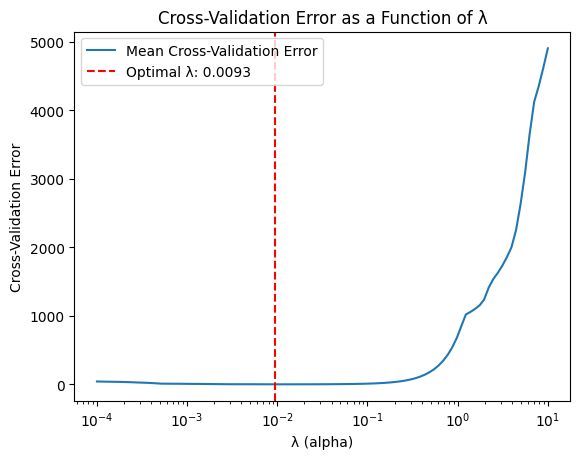

Optimal λ (alpha): 0.0093260334688322
Lasso Coefficients: [ 0.66373258 -0.21629454 -7.04301712 -0.         27.13440893 -0.
 40.94933033  0.         21.80071927  1.02296738]


In [25]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, random_state=0)
lasso_cv.fit(X_poly, Y)

plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), label="Mean Cross-Validation Error")
plt.xscale("log")
plt.xlabel("λ (alpha)")
plt.ylabel("Cross-Validation Error")
plt.title("Cross-Validation Error as a Function of λ")
plt.axvline(lasso_cv.alpha_, color="red", linestyle="--", label=f"Optimal λ: {lasso_cv.alpha_:.4f}")
plt.legend()
plt.show()

lasso_coefficients = lasso_cv.coef_
print("Optimal λ (alpha):", lasso_cv.alpha_)
print("Lasso Coefficients:", lasso_coefficients)

The cross-validation process determined 𝜆 = 0.0093, balancing model complexity and prediction accuracy.

Lasso Coefficients: [0.6637, -0.2163, -7.0430, 0, 27.1344, 0, 40.9493, 0, 21.8007, 1.0230]
Significant non-zero coefficients correspond to 𝑋1, 𝑋2, 𝑋3, 𝑋5, 𝑋7, 𝑋9 and 𝑋10.
Lasso automatically sets some coefficients (e.g., 𝑋4,𝑋6,𝑋8) to zero, effectively performing feature selection.


### (f) Now generate a response vector Y according to the model
### Y = β0 + β7X7 + ",
### and perform forward stepwise selection and the lasso. Discuss the results obtained.

In [28]:
beta_0_new = 1
beta_7_new = 2
Y_new = beta_0_new + beta_7_new * X**7 + epsilon

sfs_forward_new = SequentialFeatureSelector(model, n_features_to_select="auto", direction="forward", scoring="neg_mean_squared_error", cv=5)
sfs_forward_new.fit(X_poly, Y_new)
selected_features_forward_new = sfs_forward_new.get_support()

print("Selected features (forward selection):", selected_features_forward_new)

lasso_cv_new = LassoCV(alphas=np.logspace(-4, 1, 100), cv=5, random_state=0)
lasso_cv_new.fit(X_poly, Y_new)
lasso_coefficients_new = lasso_cv_new.coef_

print("Optimal λ (alpha):", lasso_cv_new.alpha_)
print("Lasso Coefficients:", lasso_coefficients_new)

Selected features (forward selection): [ True  True False  True  True False  True False False False]
Optimal λ (alpha): 0.002915053062825176
Lasso Coefficients: [  2.98789048  -1.57310427 -23.87538599   5.94547588  81.94562912
  -9.24116012  86.98942299   0.14079529  61.10831886   7.1915981 ]


### Forward Stepwise Selection
Selected Features: [True, True, False, True, True, False, True, False, False, False]

Interpreted Selection:

This indicates that the selected features correspond to 𝑋1,𝑋2,𝑋4,𝑋5,𝑋7.
Forward Stepwise Selection identified 𝑋7 as important, which aligns with the underlying data generation process.

Discussion:

Forward selection is greedy and sequential, meaning each step selects the feature that most improves the model.
Some irrelevant features (e.g., 𝑋1,𝑋2,𝑋4,𝑋5) might have been included due to noise or slight correlation with 𝑌.
It may miss interactions or nonlinear relationships not easily captured in a sequential framework.

### Lasso Regression
Optimal 𝜆 (𝛼): 0.0029

Lasso Coefficients:
[2.9879, -1.5731, -23.8754, 5.9455, 81.9456, -9.2412, 86.9894, 0.1408, 61.1083, 7.1916]
Lasso shrinks some coefficients towards zero while retaining significant terms.

Key Observations:

𝑋7, the feature used in the true model, has the largest coefficient (86.9894), correctly capturing its importance.
Other non-zero coefficients (e.g., 𝑋4,𝑋5,𝑋9) may result from correlations or overfitting noise.
Cross-Validation:

The optimal 𝜆 minimizes cross-validation error, balancing bias and variance.
Smaller 𝜆 indicates a lower level of regularization, allowing for more flexibility in fitting the data.
